[Notebook en Colab](https://colab.research.google.com/drive/1f-KeDJA5Ini6bnVYRz7SHJHmCdXMzXXs?usp=sharing)

# Trabajo Final Fundamentos Ciencias de Datos
***Tecnicatura Universitaria en Inteligencia Artificial***
---
**Integrantes:**
- Bruno Pace
- Giuliano Crenna


In [ ]:
%pip install plotly

In [ ]:
from typing import List, Tuple, Any
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Descripción del Dataset elegido

El dataset se puede encontrar aquí: [Dataset](https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes)

El dataset proporciona información sobre accidentes de tráfico en diversas ubicaciones, con columnas que incluyen la fecha y hora del accidente, el distrito (borough), código postal, latitud y longitud, ubicación, nombre de la calle, nombre de la calle transversal, y nombre de la calle fuera del sitio. También se reporta el número de personas heridas o muertas, incluyendo peatones, ciclistas y automovilistas. Se registran además los factores contribuyentes al accidente para dos vehículos. Ejemplos de factores incluyen distracción del conductor y fatiga.

### Columnas:

- **CRASH DATE:** Fecha del accidente.
- **CRASH TIME:** Hora del accidente.
- **BOROUGH:** Distrito de la ciudad.
- **ZIP CODE:** Código postal.
- **LATITUDE/LONGITUDE:** Coordenadas geográficas del accidente.
- **LOCATION:** Ubicación combinada (latitud y longitud).
- **ON STREET NAME:** Nombre de la calle principal.
- **CROSS STREET NAME:** Nombre de la calle transversal.
- **OFF STREET NAME:** Nombre de la calle fuera del sitio.
- **NUMBER OF PERSONS INJURED:** Número de personas heridas.
- **NUMBER OF PERSONS KILLED:** Número de personas fallecidas.
- **NUMBER OF PEDESTRIANS INJURED/KILLED:** Número de peatones heridos/fallecidos.
- **NUMBER OF CYCLIST INJURED/KILLED:** Número de ciclistas heridos/fallecidos.
- **NUMBER OF MOTORIST INJURED/KILLED:** Número de automovilistas heridos/fallecidos.
- **CONTRIBUTING FACTOR VEHICLE 1/2:** Factores contribuyentes del vehículo 1 y 2.

Cada fila del dataset representa un incidente específico con los detalles mencionados.

# Descarga del dataset

Se descarga de forma automática con el comando wget para ahorrarnos subir el archivo cada vez que ejecutamos el código.

In [ ]:
!wget -O 'crashes.csv' 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD'

--2024-05-23 02:59:17--  https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘crashes.csv’

crashes.csv             [        <=>         ] 422.45M  1.79MB/s    in 1m 43s  

2024-05-23 03:01:00 (4.09 MB/s) - ‘crashes.csv’ saved [442970780]



In [ ]:
df: pd.DataFrame = pd.read_csv('/content/crashes.csv');

<ipython-input-84-bde44d81e74d>:1: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



# Preprocesamiento de los datos

In [ ]:
def value_count_per_col(dataframe_: pd.DataFrame) -> dict[str, list]:
  """
  Esta función nos retorna un diccionario con la cantidad de valores que tiene cada columna.
  """
  values: dict[str, list] = {}
  for col in dataframe_.columns.to_list():
    values[col] = dataframe_[col].unique().tolist()

  return values

In [ ]:
def parse_string(val: str | Any) -> str | Any:
  """
  Quita los espacios y los cambia por guiones bajos.
  """
  try:
    return val.replace(' ', '_').lower()
  except:
    return val

In [ ]:
def analisis_descriptivo(df: pd.DataFrame,
                         column_name: str,
                         label: str) -> None:
  """
  Esta función nos calcula las medidas descriptivas y de dispersion de un dataset.
  """
  mediana: float = df[column_name].median()
  media: float = df[column_name].mean()
  moda: float = df[column_name].mode()[0]
  quartil_1: float = df[column_name].quantile(0.25)
  quartil_2: float = df[column_name].quantile(0.5)
  quartil_3: float = df[column_name].quantile(0.75)
  print(f'La moda de {label} es {moda}')
  print(f'La media de {label} es {media}')
  print(f'La mediana representa el punto medio de registros de {label}. Esta es: {mediana}.')
  print(f'El valor que ilustra el 25% de {label} en los registros es {quartil_1}')
  print(f'El valor que ilustra el 50% de {label} en los registros es {quartil_2}')
  print(f'El valor que ilustra el 75% de {label} en los registros es {quartil_3}')
  print(f'La dispersión de {label} es {quartil_3 - quartil_1}')

In [ ]:
def normalize_dataset(df_: pd.DataFrame) -> pd.DataFrame:
  """
  Esta función nos normaliza el dataset.
  """
  df_ = df_.copy()
  for col in df.columns.to_list():
      df_[col].apply(parse_string)
  return df_

In [ ]:
df_normalizado: pd.DataFrame = normalize_dataset(df)

Convertimos los datos de las fechas y horas de object a datetime para poder trabajarlo de la manera óptima. Se agrega el nombre de día de la semana en una columna separada.

In [ ]:
df_normalizado['CRASH DATE'] = df_normalizado['CRASH DATE'].astype('datetime64[ns]')
df_normalizado['DAY OF THE WEEK'] = df_normalizado['CRASH DATE'].dt.day_name()
df_normalizado['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M').dt.time
df_normalizado['YEAR'] = df_normalizado['CRASH DATE'].dt.year

Por una cuestion de prolijidad, reorganizamos las columnas para que los datos queden más facil de visualizar a la vista.

In [ ]:
nuevo_orden: list[str] = ['CRASH DATE', 'CRASH TIME','DAY OF THE WEEK','YEAR','BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']
df_normalizado = df_normalizado.reindex(columns=nuevo_orden)
df_normalizado = df_normalizado[nuevo_orden]

# Breve exploración de los datos

In [ ]:
print(f'El dataset contiene {df_normalizado.shape[0]} registros.')

El dataset contiene 2089674 registros.


Como vemos existem muchas columnas que tienen en casi su totalidad, datos nulos, algunas explicaciones de porque se debe esto:

- **BOROUGH y ZIP CODE:** Puede faltar esta información si el accidente ocurrió en una ubicación no específica o no registrada correctamente.
- **LATITUDE, LONGITUDE y LOCATION:** Algunos accidentes pueden no tener coordenadas precisas debido a problemas con el GPS o la falta de datos geográficos.
- **ON STREET NAME, CROSS STREET NAME y OFF STREET NAME:** No siempre se registran las calles específicas, especialmente en áreas rurales o autopistas.
- **NUMBER OF PERSONS INJURED y KILLED:** Estos datos pueden estar incompletos si los reportes no son detallados.
- **CONTRIBUTING FACTOR VEHICLE 1/2/3/4/5:** No siempre se identifica la causa del accidente, especialmente si la investigación no es concluyente.
- **VEHICLE TYPE CODE 1/2/3/4/5:** No todos los accidentes involucran múltiples vehículos o se registra el tipo de vehículo involucrado.

Vemos los valores nulos por columna, para tener información extra del dataset.

In [ ]:
df_normalizado.isna().sum()

CRASH DATE                             0
CRASH TIME                             0
DAY OF THE WEEK                        0
YEAR                                   0
BOROUGH                           650218
ZIP CODE                          650474
LATITUDE                          234619
LONGITUDE                         234619
LOCATION                          234619
ON STREET NAME                    444618
CROSS STREET NAME                 791767
OFF STREET NAME                  1737429
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6893
CONTRIBUTING FACTOR VEHICLE 2     324951
CONTRIBUTING FACTOR VEHICLE 3    1940139
CONTRIBUTING FACTOR VEHICLE 4    2055864
CONTRIBUTING FAC

# Análisis Cronológico

## División anual

In [ ]:
def obtener_dataset_en_rango(df: pd.DataFrame,
                             fecha_inicio: str,
                             fecha_final: str) -> pd.DataFrame:
  return df.copy().loc[(df_normalizado['CRASH DATE'] >= fecha_inicio) & (df_normalizado['CRASH DATE'] < fecha_final)]

In [ ]:
df_años: list[pd.DataFrame] = []

for year in range(2012, 2024+1):
  df_años.append(obtener_dataset_en_rango(df_normalizado, f'{year}-01-01', f'{year+1}-01-01'))

In [ ]:
registros_por_año: dict[int, int] = {}

for año_df, año in zip(df_años, range(2012, 2024+1)):
  registros_por_año[año] = año_df.shape[0]

In [ ]:
registros_por_año

{2012: 100545,
 2013: 203742,
 2014: 206037,
 2015: 217694,
 2016: 229831,
 2017: 231007,
 2018: 231564,
 2019: 211486,
 2020: 112916,
 2021: 110550,
 2022: 103885,
 2023: 96586,
 2024: 33831}

## Análisis

Vemos que los años 2012 y 2014 están incompletos.

In [ ]:
fecha_inicio: pd.Timestamp = df_normalizado['CRASH DATE'].min()
fecha_fin: pd.Timestamp = df_normalizado['CRASH DATE'].max()
print(f'El dataset contiene datos desde {fecha_inicio} hasta {fecha_fin}')

El dataset contiene datos desde 2012-07-01 00:00:00 hasta 2024-05-19 00:00:00


En el siguiente gráfico podemos observar la evolución de la cantidad de accidentes a lo largo del período de estudio. Vemos que el año 2018 es el año en el cual más accidentes hubo.
También, tiene sentido que desde 2020 decaiga, a consecuencia de la pandemia. Se destaca que en los años 2021 a 2023, hay una baja significativa de los accidentes con respecto a los años pre-pandemia.
Los años 2012 y 2024 no son representativos ya que no estan completos.

Sin estar conforme con nuestra hipótesis al respecto sobre el año 2020 y la posterior tendencia descendente de accidentes. Se encontró la siguiente [fuente](https://www.nyc.gov/html/dot/html/pr2023/vision-zero-fatalities-dropped-2022.shtml), la cual da cuenta de instalaciones de cámaras de velocidad en puntos estratégicos en conjunto con mayor control legislativo.

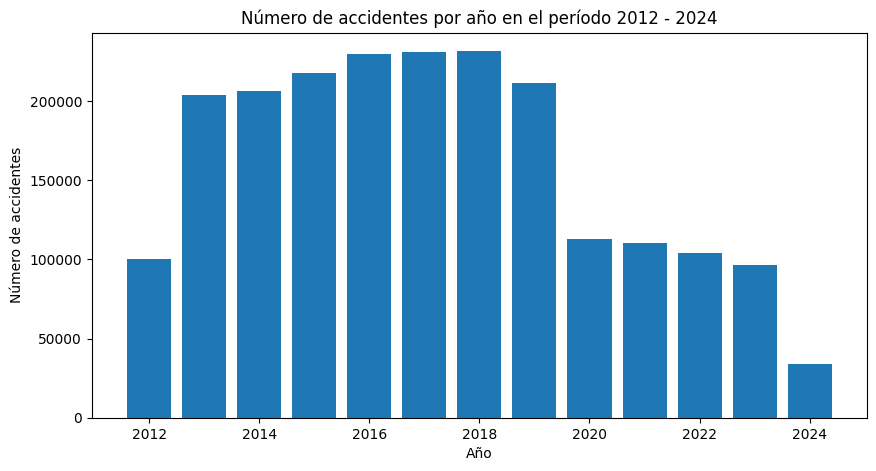

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(registros_por_año.keys(), registros_por_año.values());
plt.xlabel('Año');
plt.ylabel('Número de accidentes');
plt.title('Número de accidentes por año en el período 2012 - 2024');
plt.show();

Continuamos analizando los datos, dando especial atención a las personas heridas y muertas que deja cada evento.

In [ ]:
def extraer_personas_muertas_heridas(df: pd.DataFrame) -> dict[int, dict[str, int]] :
  """
  Esta función nos retorna un diccionario con la cantidad de personas heridas y muertas por año.
  """
  anio_inicio: pd.Timestamp = df['CRASH DATE'].min().year
  anio_fin: pd.Timestamp = df['CRASH DATE'].max().year
  aux: dict[int, dict[str, int]] = {}
  for anio in range(anio_inicio, anio_fin+1):
    datos: pd.Series = df_normalizado.loc[(df_normalizado['CRASH DATE'].dt.year == anio),
                              ["NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]].sum()
    aux[anio] = {"NUMBER OF PERSONS INJURED": datos[0], "NUMBER OF PERSONS KILLED": datos[1]}
  return aux

In [ ]:
datos_personas_muertas_heridas: dict[int, dict[str, int]]  = extraer_personas_muertas_heridas(df_normalizado)

In [ ]:
df_personas_muertas_heridas: pd.DataFrame = pd.DataFrame.from_dict(datos_personas_muertas_heridas, orient='index')

A pesar de la tendencia bajista de los accidentes desde la pandemia y la toma de medidas de tránsito por parte del gobierno, vemos que en el año 2021 se mantiene prácticamente la misma cantidad de personas muertas (296). Está extremadamente cerca del máximo del año 2013 (297).

In [ ]:
fig = px.bar(df_personas_muertas_heridas['NUMBER OF PERSONS KILLED'],
             title='Personas muertas en accidentes de tráfico',
             labels={'index' : 'años', 'value' : 'cantidad de personas'})
fig.update_layout(showlegend=False)
fig.show()

Para obtener más información, calculamos medidas descriptivas y de dispersión.

De esta manera, vemos que la tendencia es hacia el 0. Esto, tiene sentido, ya que tenemos una numerosa cantidad de eventos en los cuales nuestra moda es tener 0 personas muertas.

Se calcula la desviación estandar del rango de años 2013 - 2023 ya que los años 2012 y 2024 no son representativos por la falta de datos.

In [ ]:
variabilidad_pers_muertas: list[int] = []
for y, m in datos_personas_muertas_heridas.items():
  if y in range(2013, 2024):
    variabilidad_pers_muertas.append(m['NUMBER OF PERSONS KILLED'])

variabilidad_pers_muertas: float = pd.Series(variabilidad_pers_muertas).std()

print(f'la variabilidad de muertes en el rango [2013; 2023] es de {variabilidad_pers_muertas}')

la variabilidad de muertes en el rango [2013; 2023] es de 22.8791290361881


In [ ]:
analisis_descriptivo(df_normalizado,'NUMBER OF PERSONS KILLED', 'personas muertas')

La moda de personas muertas es 0.0
La media de personas muertas es 0.0015021704664385255
La mediana representa el punto medio de registros de personas muertas. Esta es: 0.0.
El valor que ilustra el 25% de personas muertas en los registros es 0.0
El valor que ilustra el 50% de personas muertas en los registros es 0.0
El valor que ilustra el 75% de personas muertas en los registros es 0.0
La dispersión de personas muertas es 0.0


A pesar de la tendencia bajista de los accidentes desde la pandemia y la toma de medidas de tránsito por parte del gobierno, vemos que la cantidad total de personas heridas anualmente es similar. Solo disminuye en 2020. Presuntamente debido a la pandemia.

In [ ]:
fig = px.bar(df_personas_muertas_heridas['NUMBER OF PERSONS INJURED'],
             title='Personas heridas en accidentes de tráfico',
             labels={'index' : 'años', 'value' : 'cantidad de personas'})
fig.update_layout(showlegend=False)
fig.show()

La variabilidad observada en el periodo [2013, 2023] con respecto a los números totales no es demasiado elevada.

In [ ]:
variabilidad_pers_heridas: list[int] = []
for y, m in datos_personas_muertas_heridas.items():
  if y in range(2013, 2024):
    variabilidad_pers_heridas.append(m['NUMBER OF PERSONS INJURED'])

variabilidad_pers_heridas: float = pd.Series(variabilidad_pers_heridas).std()

print(f'la variabilidad de heridas en el rango [2013; 2023] es de {variabilidad_pers_heridas}')

la variabilidad de heridas en el rango [2013; 2023] es de 5522.5872345881835


Para obtener más información, calculamos medidas descriptivas y de dispersión.

De esta manera, vemos que la tendencia es hacia el 0. Esto, tiene sentido, ya que tenemos una numerosa cantidad de eventos en los cuales nuestra moda es tener 0 personas muertas.

In [ ]:
analisis_descriptivo(df_normalizado,'NUMBER OF PERSONS INJURED', 'personas heridas')

La moda de personas heridas es 0.0
La media de personas heridas es 0.3115924343528313
La mediana representa el punto medio de registros de personas heridas. Esta es: 0.0.
El valor que ilustra el 25% de personas heridas en los registros es 0.0
El valor que ilustra el 50% de personas heridas en los registros es 0.0
El valor que ilustra el 75% de personas heridas en los registros es 0.0
La dispersión de personas heridas es 0.0


Como podemos ver en el siguiente gráfico de distribución de cantidad de personas heridas por cada año, la distribución está sezgada hacia la izquierda, osea que la mayor cantidad de accidentes tienen cero personas lastimadas.

In [ ]:
df_filtrado: pd.DataFrame = df_normalizado[df_normalizado['NUMBER OF PERSONS INJURED'] < 10]
fig = px.histogram(df_filtrado.sort_values('YEAR'),
                   x='NUMBER OF PERSONS INJURED',
                   nbins=20,
                   title='Distribución de personas heridas',
                   animation_frame='YEAR',
                   width=1100,
                   height=500)

fig.update_layout(
    xaxis_title='Número de personas heridas',
    yaxis_title='Frecuencia',
    yaxis=dict(range=[0, 200000])
)

fig.show()

In [ ]:
correlation_matrix = df_normalizado[['NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED']].corr()
fig = px.imshow(correlation_matrix,
                text_auto=True,
                aspect="auto",
                title='Heatmap de Correlaciones del Dataset de Accidentes')
fig.show()

Hacemos un analisis general de los datos, para no dejar columnas sin analizar. También, vemos que los Domingos es el día de la semana en el cual menos accidentes se reportan.

In [ ]:
print("Análisis de los datos:")
print("Número total de accidentes:", df.shape[0])
print("Número total de heridos:", df["NUMBER OF PERSONS INJURED"].sum())
print("Número total de muertos:", df["NUMBER OF PERSONS KILLED"].sum())
print("Accidentes por año:")
print(df_normalizado["YEAR"].value_counts())
print("Accidentes por día de la semana:")
print(df_normalizado["DAY OF THE WEEK"].value_counts())
print("Accidentes por borough:")
print(df_normalizado["BOROUGH"].value_counts(dropna=False))

Análisis de los datos:
Número total de accidentes: 2089674
Número total de heridos: 651121.0
Número total de muertos: 3139.0
Accidentes por año:
YEAR
2018    231564
2017    231007
2016    229831
2015    217694
2019    211486
2014    206037
2013    203742
2020    112916
2021    110550
2022    103885
2012    100545
2023     96586
2024     33831
Name: count, dtype: int64
Accidentes por día de la semana:
DAY OF THE WEEK
Friday       332943
Thursday     312296
Tuesday      307541
Wednesday    305458
Monday       298471
Saturday     281708
Sunday       251257
Name: count, dtype: int64
Accidentes por borough:
BOROUGH
NaN              650218
BROOKLYN         458115
QUEENS           386002
MANHATTAN        321951
BRONX            212940
STATEN ISLAND     60448
Name: count, dtype: int64


# Análisis geográfico

In [ ]:
df_normalizado['NUMBER OF PERSONS INJURED'] = df_normalizado['NUMBER OF PERSONS INJURED'].fillna(0)

In [ ]:
df_normalizado['NUMBER OF PERSONS INJURED'] = df_normalizado['NUMBER OF PERSONS INJURED'].astype('int')

Ordenamos el Dataset por la columna CRASH DATE

In [ ]:
df_normalizado.sort_values(by='CRASH DATE', inplace=True)

El siguiente mapa representa todos los accidentes en el año 2019, el color del punto, indica cuantas personas salieron heridas en el mismo.

In [ ]:
dataset_accidentes = df_normalizado[df_normalizado['NUMBER OF PERSONS INJURED'] > 2]

fig = px.scatter_mapbox(dataset_accidentes,
                        lat="LATITUDE",
                        lon="LONGITUDE",
                        color="NUMBER OF PERSONS INJURED",
                        size="NUMBER OF PERSONS INJURED",
                        animation_frame="YEAR",
                        mapbox_style="carto-positron",
                        zoom=9,
                        range_color=(0,40),
                        labels={'NUMBER OF PERSONS INJURED':'Cantidad de personas heridas'},
                        title='Mapa de accidentes con más de 2 heridos por año',
                        width=1150,
                        height=700)

fig.show()

# Otros gráficos útiles.

## Causa mas comunes de accidentes.
Como vemos el top de de causas de accidentes es:

1. Distracciones.
2. Conducción en el sentido equivocado.
3. Seguimiento muy de cerca.
4. En retroceso.
5. Otros.
6. Pasar a otro vehículo.
7. Pasar muy cerca de otro vehículo.
8. Giro inapropiado.
9. Fatiga del conductor.
10. Cambio de carril.


In [ ]:
factores: pd.DataFrame = df_normalizado[df_normalizado['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']
factores = factores['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)

fig = px.bar(factores,
              x=factores.index,
              y=factores.values,
              color=factores.values,
              title='Top 10 causa de accidentes',
              labels={'x': 'Factor', 'y': 'Numero de accidentes', 'color': 'Cant. lastimados'},
              width=1080,
              height=600)

fig.update_layout(xaxis_title='Factor',
                  yaxis_title='Numero de accidentes',
                  xaxis_tickangle=-45)

fig.show()

## Accidentes por ciudad (distrito) y año

Observamos que los accidentes se distribuyen mayoritariamente en los distritos más habitados. Tiene sentido que se de de la forma que se da en el tiempo.

In [ ]:
accidentes_por_ciudad: pd.DataFrame = df_normalizado.groupby(['YEAR', 'BOROUGH']).size().reset_index(name='cantidad_accidentes')

fig = px.bar(accidentes_por_ciudad,
              x='BOROUGH',
              y='cantidad_accidentes',
              color='BOROUGH',
              animation_frame='YEAR',
              title='Número de accidentes por ciudad y año.',
              labels={'BOROUGH':'Ciudad', 'cantidad_accidentes':'Cantidad de accidentes'},
              range_y=[0, accidentes_por_ciudad['cantidad_accidentes'].max() + 10],
              width=1080,
              height=600)

fig.show()